<a href="https://colab.research.google.com/github/DouglasDiasEng/Image-Extension-GAN/blob/main/Image_Extension_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

image = Image.open('/content/1888-vincent-van-gogh-the-sower.jpg')


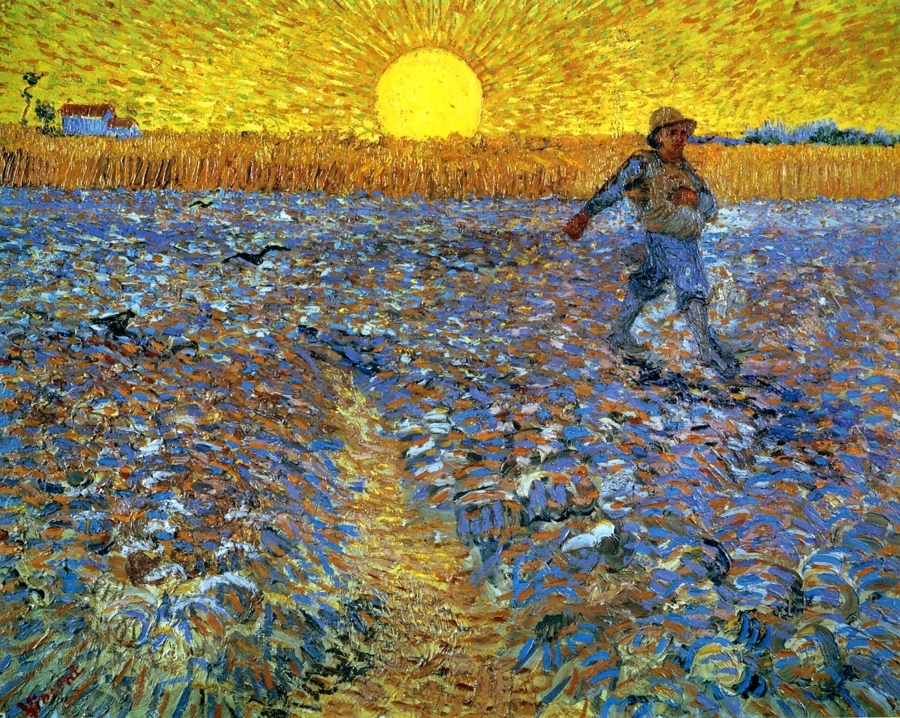

In [160]:
image

In [161]:
image.size

(900, 718)

In [162]:
width, height = image.size
print(width, height)

900 718


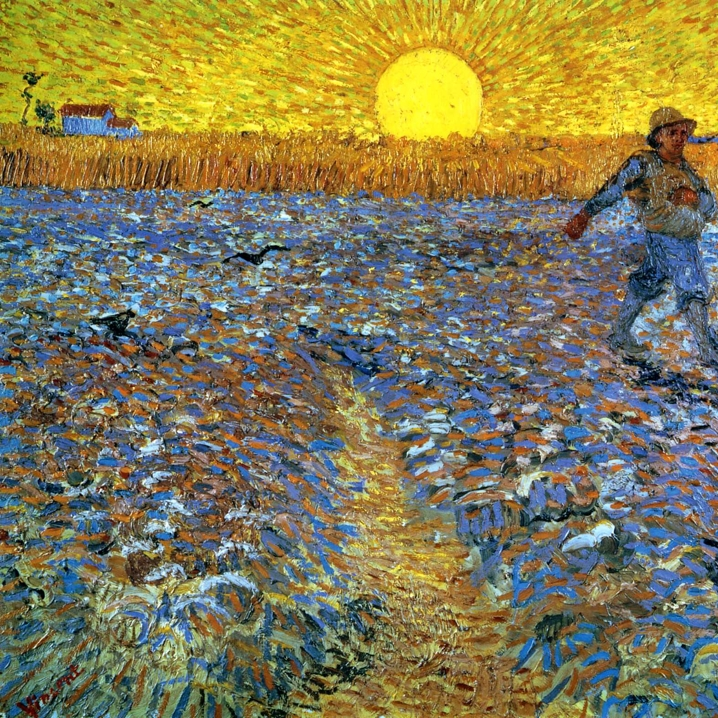

In [163]:
image = image.crop((0, 0, height, height))
image

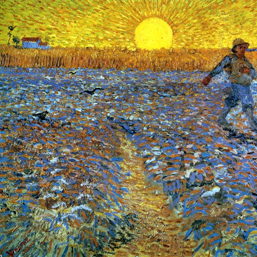

In [164]:
image = image.resize((257, 257))
image

In [165]:
image.size

(257, 257)

In [166]:
type(image)

PIL.Image.Image

In [167]:
image = np.array(image)


In [168]:
type(image)

numpy.ndarray

array([[[138, 124,  25],
        [122, 120,  20],
        [118, 122,  24],
        ...,
        [195, 131,  24],
        [199, 126,  29],
        [191, 137,  27]],

       [[148, 133,  27],
        [150, 146,  28],
        [147, 143,  34],
        ...,
        [193, 131,  23],
        [192, 144,  28],
        [195, 180,  41]],

       [[150, 131,  21],
        [155, 155,  34],
        [118, 105,  11],
        ...,
        [201, 165,  38],
        [194, 170,  37],
        [185, 178,  36]],

       ...,

       [[ 70,  75,  39],
        [ 75,  85,  55],
        [ 39,  57,  48],
        ...,
        [ 66,  87,  86],
        [ 61,  90, 112],
        [ 65,  99, 142]],

       [[120, 152, 136],
        [114, 149, 139],
        [ 38,  76,  84],
        ...,
        [ 73, 107, 107],
        [ 79,  94, 113],
        [ 87,  80,  84]],

       [[ 64,  98,  76],
        [129, 178, 177],
        [ 37,  79,  89],
        ...,
        [ 82, 101,  95],
        [ 97,  78,  65],
        [103,  65,  27]]], dtype=uint8)
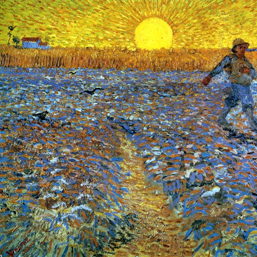

In [169]:
image

In [170]:
image.shape

(257, 257, 3)

In [171]:
image = np.expand_dims(image.astype(np.float32) / 255., axis = 0)

In [172]:
image.shape

(1, 257, 257, 3)

In [173]:
image

array([[[[0.5411765 , 0.4862745 , 0.09803922],
         [0.47843137, 0.47058824, 0.07843138],
         [0.4627451 , 0.47843137, 0.09411765],
         ...,
         [0.7647059 , 0.5137255 , 0.09411765],
         [0.78039217, 0.49411765, 0.11372549],
         [0.7490196 , 0.5372549 , 0.10588235]],

        [[0.5803922 , 0.52156866, 0.10588235],
         [0.5882353 , 0.57254905, 0.10980392],
         [0.5764706 , 0.56078434, 0.13333334],
         ...,
         [0.75686276, 0.5137255 , 0.09019608],
         [0.7529412 , 0.5647059 , 0.10980392],
         [0.7647059 , 0.7058824 , 0.16078432]],

        [[0.5882353 , 0.5137255 , 0.08235294],
         [0.60784316, 0.60784316, 0.13333334],
         [0.4627451 , 0.4117647 , 0.04313726],
         ...,
         [0.7882353 , 0.64705884, 0.14901961],
         [0.7607843 , 0.6666667 , 0.14509805],
         [0.7254902 , 0.69803923, 0.14117648]],

        ...,

        [[0.27450982, 0.29411766, 0.15294118],
         [0.29411766, 0.33333334, 0.21568628]

In [174]:
model_name = 'Boundless Half' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']

In [175]:
model_paths = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1',
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

In [176]:
model_paths = model_paths[model_name]

In [177]:
print('Model: ', model_name)
print('Path: ', model_paths)

Model:  Boundless Half
Path:  https://tfhub.dev/google/boundless/half/1


In [178]:
model = hub.load(model_paths)

In [179]:
result = model.signatures['default'](tf.constant(image))

In [180]:
print(model.signatures.keys())


KeysView(_SignatureMap({'default': <ConcreteFunction (images: TensorSpec(shape=(None, 257, 257, 3), dtype=tf.float32, name='images')) -> Dict[['masked_image', TensorSpec(shape=(None, 257, 257, 3), dtype=tf.float32, name=None)], ['default', TensorSpec(shape=(None, 257, 257, 3), dtype=tf.float32, name=None)]] at 0x7C5FE655E360>}))


In [181]:
result

{'masked_image': <tf.Tensor: shape=(1, 257, 257, 3), dtype=float32, numpy=
 array([[[[0.5411765 , 0.4862745 , 0.09803921],
          [0.47843137, 0.47058824, 0.07843137],
          [0.4627451 , 0.47843137, 0.09411764],
          ...,
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ]],
 
         [[0.5803922 , 0.52156866, 0.10588235],
          [0.5882353 , 0.57254905, 0.10980392],
          [0.5764706 , 0.56078434, 0.13333333],
          ...,
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ]],
 
         [[0.5882353 , 0.5137255 , 0.08235294],
          [0.60784316, 0.60784316, 0.13333333],
          [0.4627451 , 0.4117647 , 0.04313725],
          ...,
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ],
          [0.5       , 0.5       , 0.5       ]],
 
       

In [182]:
new_image = result['default']
masked_image = result['masked_image']

In [183]:
new_image.shape, masked_image.shape

(TensorShape([1, 257, 257, 3]), TensorShape([1, 257, 257, 3]))

In [184]:
def show_images(original_image, masked_image, new_image):
  plt.figure(figsize=(24,12))
  plt.subplot(131)
  plt.imshow((np.squeeze(original_image)))
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(132)
  plt.imshow((np.squeeze(masked_image)))
  plt.title('Masked Image')
  plt.axis('off')

  plt.subplot(133)
  plt.imshow((np.squeeze(new_image)))
  plt.title('New Image')
  plt.axis('off')

  plt.show()

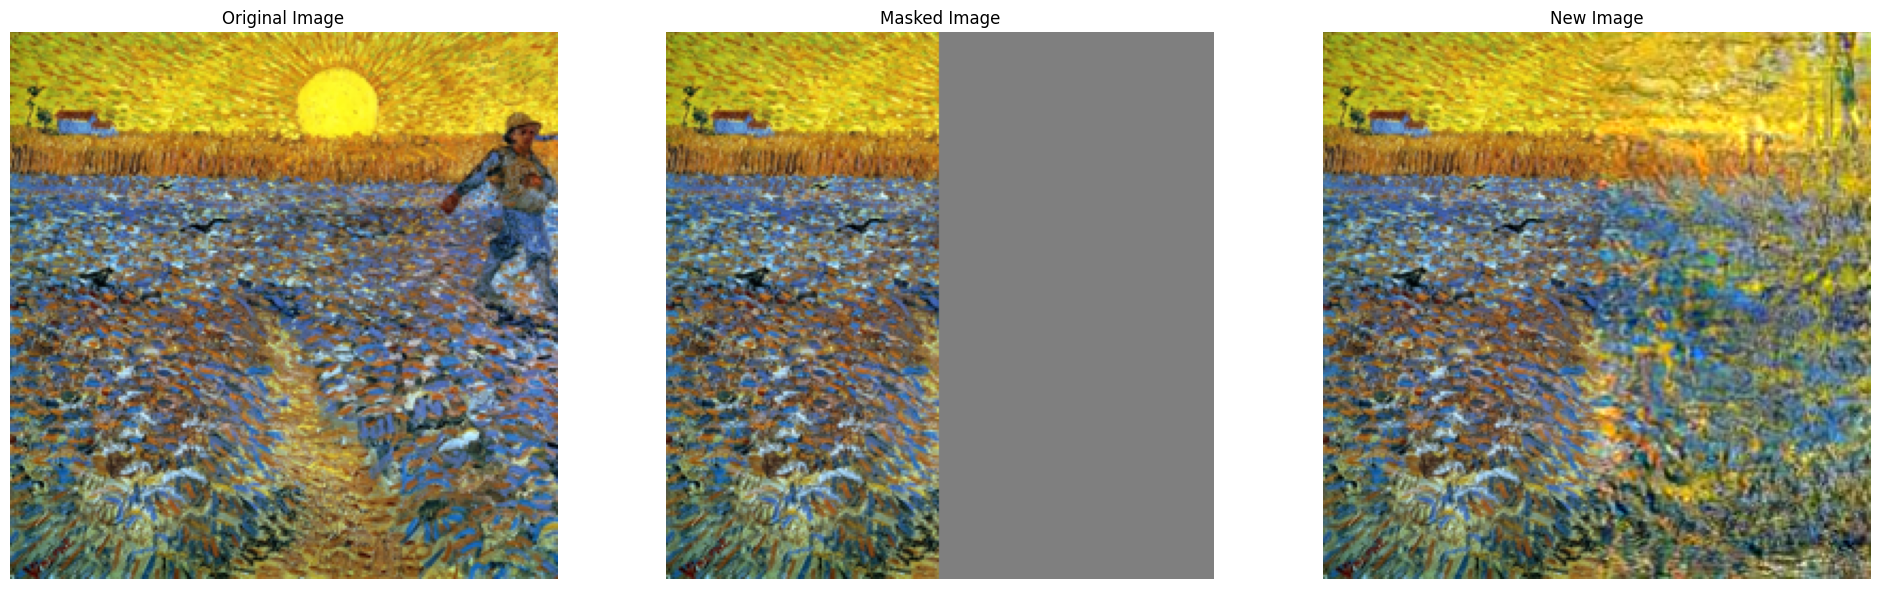

In [185]:
show_images(image, masked_image, new_image)